In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
sns.set()

pd.set_option("display.max_rows", 5)
pd.set_option('display.max_columns',100)

## Limpeza dos dados

In [100]:
df_form1 = pd.read_excel('dataset/formulario1.xlsx')
df_form1['bad_smell'] = df_form1['bad_smell'].str.lower().replace({"long method": "Long Method",
                           "métodos longos": "Long Method",
                           "método grande": "Long Method",
                           "longo método": "Long Method",
                           "método longo": "Long Method",
                           "método longo": "Long Method",
                           "método longo, muitos comentários":"Long Method",
                           "duplicade code":"Duplicade Code",
                           "código duplicado":"Duplicade Code",
                           "duplicated code":"Duplicade Code",
                           "codigo duplicado":"Duplicade Code",
                           "código duplicado,":"Duplicade Code",
                           "código duplicado + outro":"Duplicade Code",
                           "complexidade ciclomática": "Cyclomatic Complexity",
                           "método longo com grande complexidade ciclomatica":"Cyclomatic Complexity",
                           "método longo com grande complexidade ciclomatica, método invejoso":"Cyclomatic Complexity",
                           "grande complexidade ciclomática":"Cyclomatic Complexity",
                           "relativa complexidade ciclomática":"Cyclomatic Complexity",
                           "classe grande, muitos comentários": "Long Class",
                           "classe grande":"Long Class",
                           "classe longa":"Long Class",
                           "long class":"Long Class",
                           "god class":"Long Class",
                           "god method":"Long Method",
                           "longa lista de parâmetros":"Long Parameter List",
                           "métodos com muitos parâmetros":"Long Parameter List",
                           "método com muitos parâmetros":"Long Parameter List",
                           "long parameter list":"Long Parameter List",
                           "longa lista de parametros":"Long Parameter List",
                           "muitos parâmetros":"Long Parameter List",
                           "classe de dados":"Data Class",
                           "switch":"Switch",
                           "switch case":"Switch",
                           "uso indevido de switch":"Switch",
                           "switch statement":"Switch",
                           "método invejoso":"Envy",
                           "envy class":"Envy",
                           "sem valor": "No Value",
                           "nome do método pode ser melhor": "No Value",
                           "não utilização de padrão de nomenclatura": "No Value",
                           "se algo no cliente for alterado + precisará alterar em diversos arquivos + códigos semelhantes.": "No Value"})
display(df_form1['bad_smell'].unique())


df_form1['classe'] = df_form1['classe'].replace({
    "AGENCIA":"Agencia",
    "Agência":"Agencia",
    "agencia":"Agencia",
    "EMPRESA":"Empresa",
    "carteira":"Carteira"
})
df_form1['matricula'] = df_form1['matricula'].astype(int)
df_form1['metodo'] = df_form1['metodo'].str.lower()
df_form1 = df_form1[df_form1['classe'] != 'sem valor']
df_form1 = df_form1[df_form1['bad_smell'] != 'No Value']
display(df_form1['classe'].unique())
display(df_form1)

array(['Long Method', 'Duplicade Code', 'Cyclomatic Complexity',
       'Long Class', 'No Value', 'Long Parameter List', 'Data Class',
       'Switch', 'Envy'], dtype=object)

array(['Agencia', 'Carteira', 'Empresa', 'Climas', 'Estacao', 'Cliente',
       'Destino'], dtype=object)

,nome,matricula,horario_inicio,horario_fim,classe,metodo,bad_smell,descricao,sugestao,refatoracao,nivel_dificuldade_encontrar,certeza_do_bad_smell
0,Thiago Abreu Lopes,469845,15:54:00,15:59:00,Agencia,agendaviagem,Long Method,Método com muitas linhas de código,Fracionar esse único módulo em módulos menores\n,"Sim, a longo prazo pode vir a ser um problema ...",Fácil,Muita Certeza
1,Thiago Abreu Lopes,469845,15:59:00,16:01:00,Agencia,agendaviagemparaestacao,Long Method,Método com muitas linhas de código,Fracionar esse único módulo em módulos menores,"Sim, a longo prazo pode vir a ser um problema ...",Intermediário,Intermediário
...,...,...,...,...,...,...,...,...,...,...,...,...
284,Vinicius Tabosa dos Santos,472107,16:14:00,16:19:00,Agencia,agendaviagemparaestado,Duplicade Code,Sem valor,Criar uma classe com seus próprios métodos que...,"Sim, o método é logo e não faz sentido ficar n...",Fácil,Intermediário
285,Vinicius Tabosa dos Santos,472107,16:14:00,16:19:00,Agencia,agendaviagem2,Duplicade Code,Sem valor,Criar uma classe com seus próprios métodos que...,"Sim, o método é logo e não faz sentido ficar n...",Fácil,Intermediário


In [129]:
df_form2 = pd.read_excel('dataset/feedback.xlsx')
df_form2['3_Entendimento_Bad_Smells'].replace({'Baixo\n':'Baixo'},inplace=True)
df_form2['4_BadSmells_Prejudiciais'] = df_form2['4_BadSmells_Prejudiciais'].fillna("No Value")
text_list = list(df_form2['4_BadSmells_Prejudiciais'])
all_bad_smells = []
for text in text_list:
    all_bad_smells.extend(text.split(','))
bad_smells = pd.DataFrame(all_bad_smells,columns=['bad smell'])
bad_smells['bad smell'].replace({
    " Métodos com muitos parâmetros":"Métodos com muitos parâmetros",
    "  Shotgun Surgery ":"Shotgun Surgery",
    " Shotgun Surgery ":"Shotgun Surgery",
    " Métodos Longos": "Métodos Longos",
    " Classes Grandes":"Classes Grandes",
    " Classe Invejosa":"Classe Invejosa",
    " Método Invejoso":"Método Invejoso"
},inplace=True)
display(bad_smells['bad smell'].unique())

df_form2['¨6_Atributos_Mais_Importantes'] = df_form2['¨6_Atributos_Mais_Importantes'].fillna("No Value")
text_list = list(df_form2['¨6_Atributos_Mais_Importantes'])
all_atributos = []
for text in text_list:
    all_atributos.extend(text.split(','))
atributos = pd.DataFrame(all_atributos,columns=['atributos'])
atributos['atributos'].replace({
    " Modularização": "Modularização",
    " Continuidade":"Continuidade",
    " Testabilidade": "Testabilidade",
    " Estruturação do código":"Estruturação do código"
},inplace=True)
display(atributos['atributos'].unique())

array(['Métodos Longos', 'Métodos com muitos parâmetros',
       'Shotgun Surgery', 'No Value', 'Código duplicado',
       'Classes Grandes', 'Classe Invejosa', 'Método Invejoso'],
      dtype=object)

array(['Inteligibilidade', 'Modularização', 'No Value', 'Continuidade',
       'Estruturação do código', 'Testabilidade'], dtype=object)

In [101]:
df_form4 = pd.read_excel('dataset/horáculo.xlsx')
df_form4['metodo'] = df_form4['metodo'].str.lower()
df_form4

,classe,metodo,bad smell
0,Cliente,cliente,Duplicade Code
1,Cliente,cliente,Long Parameter List
...,...,...,...
40,Carteira,construtor,Long Parameter List
41,Carteira,carteira,Long Parameter List


In [102]:
horaculo = df_form4['metodo'].unique()
df_form1['metodo'] = df_form1['metodo'].replace({
    'agenciaviagem':'agendaviagem',
    'agendaviagemparaestaacao':'agendaviagemparaestacao',
    'compranodebitouptade':'compranodebitoupdate',
    'public agencia':'agencia',
    'calculasaldoagencia;':'calculasaldoagencia',
    'calculasaldoagencia2;': 'calculasaldoagencia2',
    'compranocredito;': 'compranocredito',
    'agenciacalculasaldoagencia3':'calculasaldoagencia3',
    'adiciona destido':'adicionadestido',
    'calculasaldoagencia1':'calculasaldoagencia',
    'agendaviagemparaestado':'agendaviagemparaestacao',
    'adicionadestido':'adicionadestino',
    'a classe toda':'sem valor',
    'construtores da classe':'empresa',
    'construtor da classe': 'cliente'
})

## Taxa de acurácia por classe

In [103]:
for classe in df_form1['classe'].unique():
    data = df_form1[df_form1['classe'] == classe]
    cont = 0
    for metodo in df_form1['metodo'].unique():
        data_metodo = data[data['metodo']==metodo]
        horaculo_for_method = list(df_form4[df_form4['metodo']==metodo]['bad smell'])
        bad_smells = list(data_metodo['bad_smell'])
        for bad in data_metodo['bad_smell']:
            if(bad in horaculo_for_method): cont +=1
    print(classe)
    print(cont/len(data)*100,end='\n\n')

Agencia
81.74603174603175

Carteira
98.4126984126984

Empresa
76.08695652173914

Climas
0.0

Estacao
0.0

Cliente
80.0

Destino
100.0



## Taxa de acurácia por aluno e classe

In [104]:
acc_alunos = []
for aluno in df_form1['matricula'].unique():
    data_aluno = df_form1[df_form1['matricula'] == aluno]
    for classe in data_aluno['classe'].unique():
        data = data_aluno[data_aluno['classe'] == classe]
        cont = 0
        for metodo in data_aluno['metodo'].unique():
            data_metodo = data[data['metodo']==metodo]
            horaculo_for_method = list(df_form4[df_form4['metodo']==metodo]['bad smell'])
            bad_smells = list(data_metodo['bad_smell'])
            for bad in data_metodo['bad_smell']:
                if(bad in horaculo_for_method): cont +=1

        acc = cont/len(data)*100
        acc_alunos.append({
            "matricula": aluno,
            "classe":classe,
            "acc": acc
        })

acc_alunos = pd.DataFrame(acc_alunos)


In [105]:
acc_alunos = acc_alunos[acc_alunos['classe']!= 'Climas']
acc_alunos = acc_alunos[acc_alunos['classe']!= 'Estacao']

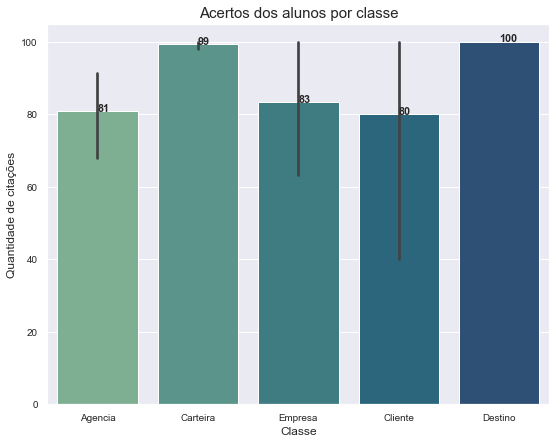

In [106]:
sns.set_style("whitegrid")
sns.set(font_scale=0.9)
bar,ax = plt.subplots(figsize=(9,7))
ax = sns.barplot(x='classe',y='acc',data=acc_alunos,  palette="crest",orient='v')
ax.set_title('Acertos dos alunos por classe', fontsize=15)
ax.set_ylabel("Quantidade de citações", fontsize=12)
ax.set_xlabel("Classe", fontsize=12)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.f"% rect.get_height(), weight='bold')

## Código para verificar onde ta errando

In [107]:
for classe in df_form1['classe'].unique():
    data = df_form1[df_form1['classe'] == classe]
    cont = 0
    for metodo in df_form1['metodo'].unique():
        data_metodo = data[data['metodo']==metodo]
        horaculo_for_method = list(df_form4[df_form4['metodo']==metodo]['bad smell'])
        bad_smells = list(data_metodo['bad_smell'])
        for bad in data_metodo['bad_smell']:
            if(bad in horaculo_for_method): cont +=1
            else:
                print(f"Classe:{classe}, Metodo: {metodo}, Bad Smell: {bad}", end='\n\n')

Classe:Agencia, Metodo: agendaviagem, Bad Smell: Cyclomatic Complexity

Classe:Agencia, Metodo: agendaviagem, Bad Smell: Cyclomatic Complexity

Classe:Agencia, Metodo: agendaviagem, Bad Smell: Cyclomatic Complexity

Classe:Agencia, Metodo: agendaviagem, Bad Smell: Cyclomatic Complexity

Classe:Agencia, Metodo: agendaviagem, Bad Smell: Cyclomatic Complexity

Classe:Agencia, Metodo: agendaviagemparaestacao, Bad Smell: Cyclomatic Complexity

Classe:Agencia, Metodo: agendaviagemparaestacao, Bad Smell: Cyclomatic Complexity

Classe:Agencia, Metodo: agendaviagemparaestacao, Bad Smell: Cyclomatic Complexity

Classe:Agencia, Metodo: agendaviagemparaestacao, Bad Smell: Cyclomatic Complexity

Classe:Agencia, Metodo: agendaviagemparaestacao, Bad Smell: Cyclomatic Complexity

Classe:Agencia, Metodo: agendaviagemparaestacao, Bad Smell: Cyclomatic Complexity

Classe:Agencia, Metodo: agendaviagem2, Bad Smell: Cyclomatic Complexity

Classe:Agencia, Metodo: agendaviagem2, Bad Smell: Cyclomatic Complexi

## Quantidade de citações por Bad Smells

In [108]:
data = df_form1['bad_smell'].value_counts().reset_index()
data = data[data['index']!='No Value']
data

,index,bad_smell
0,Duplicade Code,151
1,Long Method,32
...,...,...
6,Data Class,5
7,Switch,4


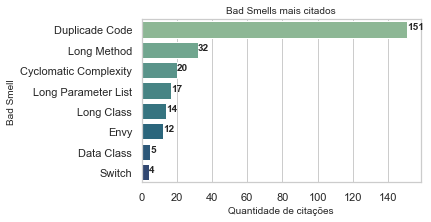

In [115]:
data = df_form1['bad_smell'].value_counts().reset_index()
data = data[data['index']!='No Value']

column_name = 'bad_smell'
sns.set(font_scale=1)
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(5,3))
ax = sns.barplot(x=column_name, y='index', data=data,  palette="crest")
ax.set_title("Bad Smells mais citados", fontsize=10)
ax.set_xlabel("Quantidade de citações", fontsize=10)
ax.set_ylabel("Bad Smell", fontsize=10)
for rect in ax.patches:
    ax.text(rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.f"% rect.get_width(), weight='bold', fontsize=10)

## Others

In [117]:
df_form1[df_form1['bad_smell']=='Data Class']

,nome,matricula,horario_inicio,horario_fim,classe,metodo,bad_smell,descricao,sugestao,refatoracao,nivel_dificuldade_encontrar,certeza_do_bad_smell
28,Andressa Gomes Moreira,545080,16:11:00,16:14:00,Climas,sem valor,Data Class,sem valor,Adicionar métodos para evitar que a classe pos...,Não.,Intermediário,Intermediário
29,Andressa Gomes Moreira,545080,16:15:00,16:16:00,Estacao,sem valor,Data Class,sem valor,Adicionar métodos para evitar que a classe pos...,Não.,Intermediário,Intermediário
85,Francisco Antonio Paiva de Sousa,421948,16:09:00,16:11:00,Climas,sem valor,Data Class,sem valor,Criar uma estrutura de dados onde os dados ser...,sem valor,Muito Fácil,Extrema Certeza
86,Francisco Antonio Paiva de Sousa,421948,16:11:00,16:13:00,Estacao,sem valor,Data Class,sem valor,Criar uma estrutura de dados onde os dados ser...,sem valor,Muito Fácil,Extrema Certeza
115,Gabriel Vasconcelos Santos,497688,16:16:00,16:20:00,Cliente,sem valor,Data Class,sem valor,"Movendo os métodos: adicionaCliente, removeCli...","Sim, esse bad smells quebra toda a lógica da o...",Fácil,Muita Certeza


In [128]:
df_form2

0     469845
1     412723
       ...  
26    427867
27    472107
Name: Matricula, Length: 28, dtype: int32

In [169]:
df_form2['Matricula'] = df_form2['Matricula'].astype(int)
data = df_form2[['Matricula','1_Entendimento_Java','2_Entendimento_OO','3_Entendimento_Bad_Smells','5_Atributos_Qualidade']]
data = data.rename(columns={'Matricula':'matricula'})
data

,matricula,1_Entendimento_Java,2_Entendimento_OO,3_Entendimento_Bad_Smells,5_Atributos_Qualidade
0,469845,Intermediário,Intermediário,Bom,Intermediário
1,412723,Intermediário,Bom,Intermediário,Bom
...,...,...,...,...,...
26,427867,Baixo,Baixo,Intermediário,Baixo
27,472107,Intermediário,Baixo,Intermediário,Intermediário


In [170]:
data_nivel = pd.merge(
    data,
    acc_alunos[["matricula", "classe",'acc']],
    how="left",
    on="matricula",
)
data_nivel

,matricula,1_Entendimento_Java,2_Entendimento_OO,3_Entendimento_Bad_Smells,5_Atributos_Qualidade,classe,acc
0,469845,Intermediário,Intermediário,Bom,Intermediário,Agencia,66.666667
1,469845,Intermediário,Intermediário,Bom,Intermediário,Carteira,100.000000
...,...,...,...,...,...,...,...
72,472107,Intermediário,Baixo,Intermediário,Intermediário,Empresa,100.000000
73,472107,Intermediário,Baixo,Intermediário,Intermediário,Agencia,100.000000


Text(0.5, 0, 'Nível de conhecimento')

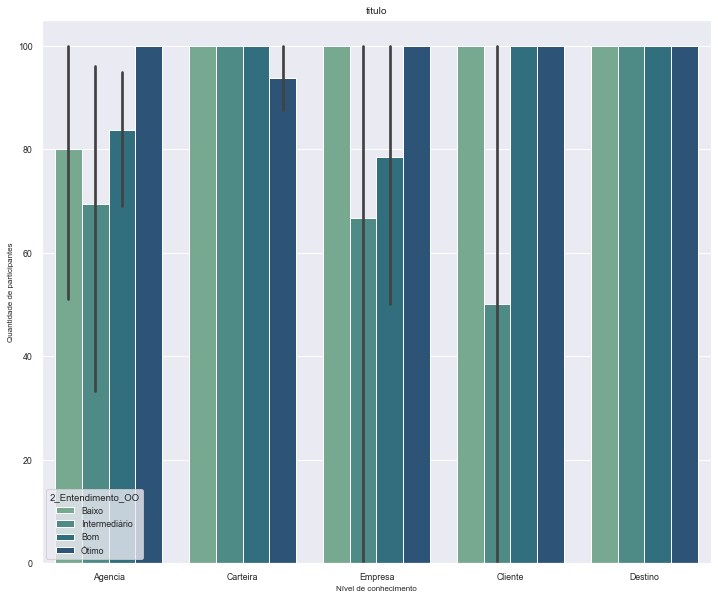

In [171]:
sns.set_style("whitegrid")
sns.set(font_scale=0.8)
bar,ax = plt.subplots(figsize=(12,10))
ax = sns.barplot(x='classe', y='acc',data=data_nivel,hue='2_Entendimento_OO', palette="crest",orient='v',hue_order=['Baixo',"Intermediário",'Bom',"Ótimo"])
ax.set_title('titulo', fontsize=10)
ax.set_ylabel("Quantidade de participantes", fontsize=8)
ax.set_xlabel("Nível de conhecimento", fontsize=8)
# calculate the percentages and annotate the sns barplot
# for rect in ax.patches:
#     ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.f"% rect.get_height(), weight='bold' )

Text(0.5, 0, 'Nível de conhecimento')

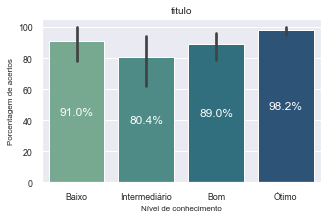

In [173]:
sns.set_style("whitegrid")
sns.set(font_scale=0.8)
bar,ax = plt.subplots(figsize=(5,3))
ax = sns.barplot(x='2_Entendimento_OO', y='acc',data=data_nivel, palette="crest",orient='v',order=['Baixo',"Intermediário",'Bom',"Ótimo"])
ax.bar_label(
    ax.containers[0],
    fmt='%.1f%%',
    label_type='center',
    color='white',
    size = 12
)
ax.set_title('titulo', fontsize=10)
ax.set_ylabel("Porcentagem de acertos", fontsize=8)
ax.set_xlabel("Nível de conhecimento", fontsize=8)
#calculate the percentages and annotate the sns barplot
# for rect in ax.patches:
#     ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.f"% rect.get_height(), weight='bold' )

In [138]:
data_nivel[data_nivel['matricula']==472107]

,matricula,1_Entendimento_Java,2_Entendimento_OO,3_Entendimento_Bad_Smells,classe,acc
72,472107,Intermediário,Baixo,Intermediário,Empresa,100.0
73,472107,Intermediário,Baixo,Intermediário,Agencia,100.0


In [131]:
acc_alunos

,matricula,classe,acc
0,469845,Agencia,66.666667
1,469845,Carteira,100.000000
...,...,...,...
74,472107,Empresa,100.000000
75,472107,Agencia,100.000000


In [122]:
acc_alunos[acc_alunos['matricula']==379009]

,matricula,classe,acc
64,379009,Agencia,100.0
65,379009,Carteira,100.0
66,379009,Cliente,100.0
67,379009,Destino,100.0
